### Natural Language Processing (NLP)
    

### Key Terms
+ Corpus
+ Tokenization
+ Lemmatization
+ Stemming
+ POS Tagging
+ NER
+ Stop Words

### Working with NLTK (Natural Language Toolkit)


#### Downlading the nltk resources:


In [1]:
import nltk

#### Tokenization:

In [2]:
from nltk.tokenize import word_tokenize, sent_tokenize

text = "Natural Language Processing is very interesting. It involves understanding human language."
print(f"Original Text: {text}")

sentences = sent_tokenize(text)
print(f"\nTokenized Sentences: {sentences}")

Original Text: Natural Language Processing is very interesting. It involves understanding human language.

Tokenized Sentences: ['Natural Language Processing is very interesting.', 'It involves understanding human language.']


#### Stop Words Removal


In [3]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

words = word_tokenize(text)
filtered_words = [word for word in words if word.lower() not in stop_words]
print("Filtered Words :", filtered_words)

Filtered Words : ['Natural', 'Language', 'Processing', 'interesting', '.', 'involves', 'understanding', 'human', 'language', '.']


#### Stemming

In [4]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

words = ["running", "ran", "runs"]
stemmed = [stemmer.stem(word) for word in words]
print("Stemmed Words:", stemmed)

Stemmed Words: ['run', 'ran', 'run']


#### Lemmatization

In [5]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

words = ["running","ran", "better", "ate", "eating"]
lemmatized = [lemmatizer.lemmatize(word, pos = "v") for word in words]
print("Lemmatized Words:", lemmatized)

Lemmatized Words: ['run', 'run', 'better', 'eat', 'eat']


### Text Processing

+ Common Steps:
    + Lowercasing
    + Removal of punctuations
    + Tokenization
    + StopWords Removal
    + Stemming or Lemmatization
    + Removing Numbers
    + Handling special characters



In [6]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

text = "NLTK is a leading platform for building Python programs to work with human language data."

# Lowercasing
text = text.lower()

# Removing punctuation and numbers
text = re.sub(r"[^a-zA-Z\s]", "", text)

# Tokenization
tokens = word_tokenize(text)

# Stopword removal
filtered = [word for word in tokens if word not in stop_words]

# Lemmatization
lemmatized = [lemmatizer.lemmatize(word) for word in filtered]

print("Preprocessed Texts: ", lemmatized)

Preprocessed Texts:  ['nltk', 'leading', 'platform', 'building', 'python', 'program', 'work', 'human', 'language', 'data']


### Vectorizers


### Document Classificaion Example

In [7]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\RICKY/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\RICKY/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RICKY/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\RICKY/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
df = pd.read_csv("bbc_data.csv")

In [9]:
df.head(5)

,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment


In [10]:
pd.isnull(df)

,data,labels
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2220,False,False
2221,False,False
2222,False,False
2223,False,False


In [11]:
# Initialize tools 
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [12]:
# custom text processing function
def preprocess(text):
    # Lowercasing
    text = text.lower()

    # Removing punctuation and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Tokenization
    tokens = word_tokenize(text)

    #stopwords removal 
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(cleaned)

In [13]:
# Make sure df is the DataFrame loaded from the CSV
df = pd.read_csv("bbc_data.csv")

# Apply preprocessing 
df['clean_text'] = df['data'].apply(preprocess)

In [14]:
df

,data,labels,clean_text
0,Musicians to tackle US red tape Musicians gro...,entertainment,musician tackle u red tape musician group tack...
1,"U2s desire to be number one U2, who have won ...",entertainment,u desire number one u three prestigious grammy...
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment,rocker doherty onstage fight rock singer pete ...
3,Snicket tops US box office chart The film ada...,entertainment,snicket top u box office chart film adaptation...
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment,ocean twelve raid box office ocean twelve crim...
...,...,...,...
2220,Warning over Windows Word files Writing a Mic...,tech,warning window word file writing microsoft wor...
2221,Fast lifts rise into record books Two high-sp...,tech,fast lift rise record book two highspeed lift ...
2222,Nintendo adds media playing to DS Nintendo is...,tech,nintendo add medium playing d nintendo releasi...
2223,Fast moving phone viruses appear Security fir...,tech,fast moving phone virus appear security firm w...


In [15]:
# Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['labels']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [17]:
import pickle

with open('Document_Classification_Model.pkl', 'wb') as model_file:
    pickle.dump(clf, model_file)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

In [ ]:
# Predict and Evaluate 
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.96      0.99      0.98       103
entertainment       1.00      0.94      0.97        84
     politics       0.91      0.97      0.94        80
        sport       0.98      0.99      0.98        98
         tech       1.00      0.94      0.97        80

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445



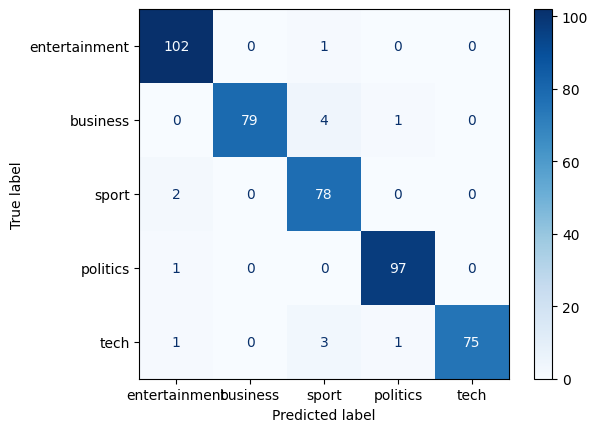

In [ ]:
#confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['labels'].unique())
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### Example Inference


In [ ]:
sample_text = "He is a software engineer who loves coding and solving problems."

#preprocess using the same steps
sample_text_cleaned = preprocess(sample_text)

#Vectorize
sample_vector = vectorizer.transform([sample_text_cleaned])

#predict
predicted_category = clf.predict(sample_vector)
print("Predicted Category:", predicted_category[0])

Predicted Category: tech


In [ ]:
'''
1. Understand logic:
TfidfVectorizer
WordNetLemmatizer
MultinomialNB

2. Imlpement UI for Documnet Classification.

3. Spam and ham Email classification (use switchable dataset from kaggle)

4. Spam and Ham classifier AGENT :
   -use Suitable model from grok
   -Do suitable prompt Engineering
   -Output should be in json format":
   {"email_type": "spam" or "ham",
   "reason": "reason why that email is spam or ham"}
'''